<a href="https://colab.research.google.com/github/SahilJin123/DeepLearning/blob/main/Neural_network_for_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import cv2
from google.colab.patches import cv2_imshow


In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
#image values in form of array
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

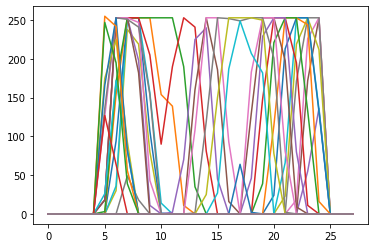

In [9]:
plt.plot(x_train[0])

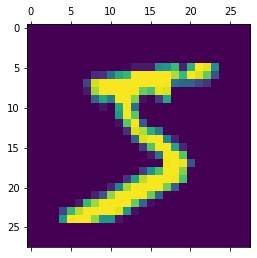

In [10]:
plt.matshow(x_train[0])

In [11]:
cv2_imshow(x_train[0])

In [12]:
#it is in 3d array
x_train.shape

(60000, 28, 28)

In [13]:
#this  is done so that when we apply sigmoid function it comes in range 0 and 1 with good accuraccy

x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
#By reshaping it is now in 2d array
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [15]:
#keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')] here 10 denotes number of output neurons 
model = keras.Sequential(
    [keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')]) 
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )



In [16]:
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9247


In [18]:
model.evaluate(x_test_flatten,y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.9257


[0.26665979623794556, 0.9257000088691711]

In [76]:
y_predict = model.predict(x_test_flatten)
y_predict[1000]

array([2.1272392e-05, 5.2046776e-03, 8.8170171e-04, 9.2893887e-01,
       1.4598489e-01, 8.1835389e-03, 8.3848026e-06, 9.2749375e-01,
       7.5198472e-02, 9.8122680e-01], dtype=float32)

In [77]:
print(y_test[1000])

9


In [78]:
np.argmax(y_predict[1000])

9

In [85]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [86]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [89]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    8,    3,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   3,    8,  935,   13,    8,    2,   13,   10,   38,    2],
       [   2,    0,   23,  924,    1,   17,    2,   11,   24,    6],
       [   1,    1,    5,    0,  924,    0,   11,    3,   11,   26],
       [   8,    3,    5,   42,   11,  753,   19,    6,   39,    6],
       [   7,    3,    7,    1,    7,    6,  922,    2,    3,    0],
       [   1,    5,   27,    6,    6,    0,    0,  946,    5,   32],
       [   4,    7,    7,   17,    9,   20,   10,    9,  885,    6],
       [   8,    7,    2,   10,   38,    4,    0,   24,   14,  902]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

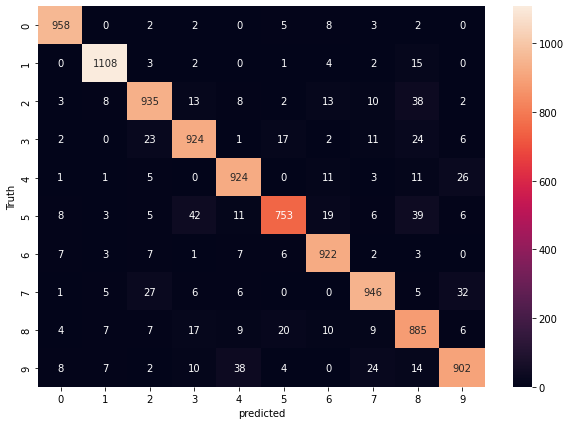

In [91]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

**With Hidden Layers**

In [94]:
#keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')] here 10 denotes number of output neurons 
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                          ]) 
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )


In [95]:
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1213 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9842


In [96]:
model.evaluate(x_test_flatten,y_test) 

313/313 [==============================] - 1s 1ms/step - loss: 0.0774 - accuracy: 0.9769


[0.07744866609573364, 0.9768999814987183]

Text(69.0, 0.5, 'Truth')

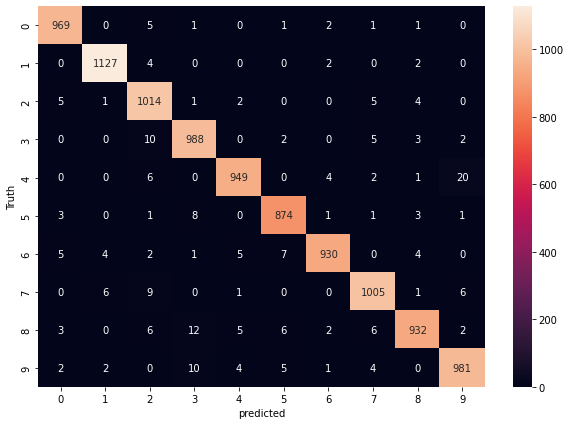

In [99]:

y_predict = model.predict(x_test_flatten)
y_predict_labels = [np.argmax(i) for i in y_predict]


cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [75]:
#doubt

import pandas as pd
img=cv2.imread('/content/download (4).png',0)
print(x_train.shape)
#print(img)
#img=img/255
#img.shape
# x=pd.DataFrame()

img = img.reshape(img,28*28)
print(img)

(60000, 28, 28)


TypeError: ignored

In [68]:
y_predict = model.predict(img)
y_predict

ValueError: ignored

In [59]:
np.argmax(y_predict)

2